<a href="https://colab.research.google.com/github/KevinCY-Kim/Deeplearning/blob/main/p_value%EC%99%80_%EA%B7%80%EB%AC%B4%EB%8C%80%EB%A6%BD%EA%B0%80%EC%84%A4_%EA%B0%80%EB%8A%A5%EC%84%B1_%ED%9D%90%EB%A6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

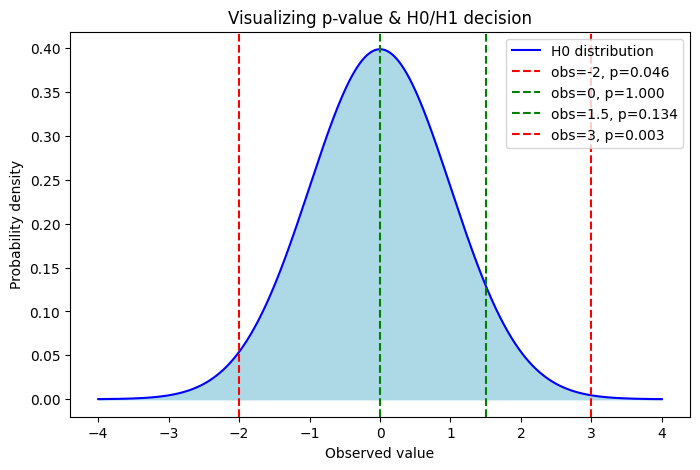

In [1]:
# p-value와 귀무대립가설 가능성 흐름
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 설정
mu0 = 0           # 귀무가설 평균
sigma = 1         # 표준편차
x = np.linspace(-4, 4, 1000)

# H0 분포
h0_pdf = norm.pdf(x, loc=mu0, scale=sigma)

# p-value 예시 (양측)
obs_values = [-2, 0, 1.5, 3]  # 관찰값 예시
alpha = 0.05

plt.figure(figsize=(8,5))
plt.plot(x, h0_pdf, label="H0 distribution", color='blue')
plt.fill_between(x, 0, h0_pdf, color='lightblue')

# 관찰값 표시 및 p-value 계산
for obs in obs_values:
    p_val = 2 * (1 - norm.cdf(abs(obs), loc=mu0, scale=sigma))  # 양측
    color = 'red' if p_val < alpha else 'green'
    plt.axvline(obs, color=color, linestyle='--', label=f"obs={obs}, p={p_val:.3f}")

plt.title("Visualizing p-value & H0/H1 decision")
plt.xlabel("Observed value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🔹 설명

파란색 곡선: 귀무가설(H0) 분포

점선: 관찰값(obs) 위치

빨간색 → p < 0.05 → H0 기각 → H1 쪽 가능성 ↑

초록색 → p ≥ 0.05 → H0 기각 실패 → H0 가능성 열어둠

시각적으로 데이터가 H0 분포에서 얼마나 극단적인지 확인 가능

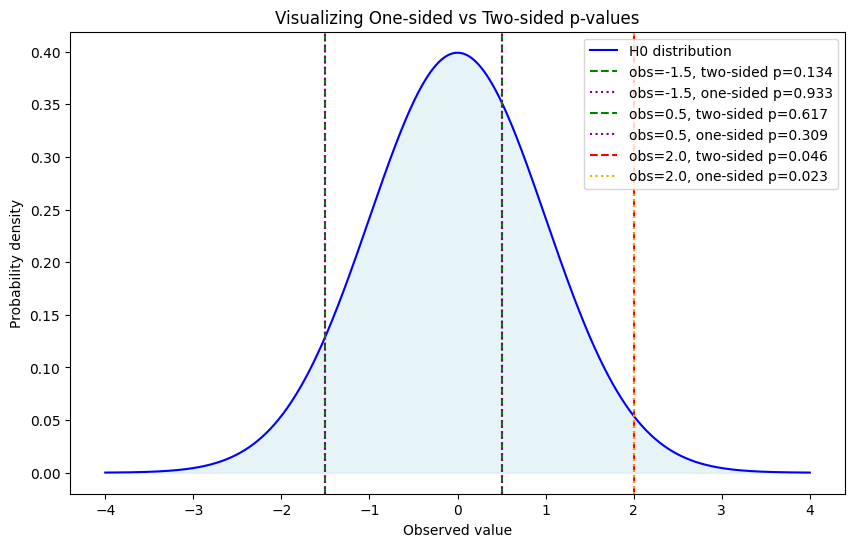

In [2]:
# 임상/실험에서 p-value가 어떻게 해석되는지
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 설정
mu0 = 0           # 귀무가설 평균
sigma = 1         # 표준편차
x = np.linspace(-4, 4, 1000)
alpha = 0.05      # 유의수준

# 관찰값 예시 (실험 결과)
obs_values = [-1.5, 0.5, 2.0]

# H0 분포
h0_pdf = norm.pdf(x, loc=mu0, scale=sigma)

plt.figure(figsize=(10,6))
plt.plot(x, h0_pdf, label="H0 distribution", color='blue')
plt.fill_between(x, 0, h0_pdf, color='lightblue', alpha=0.3)

for obs in obs_values:
    # 양측 p-value
    p_two = 2 * (1 - norm.cdf(abs(obs), loc=mu0, scale=sigma))
    # 단측 p-value (오른쪽 꼬리)
    p_one = 1 - norm.cdf(obs, loc=mu0, scale=sigma)

    # 색상 결정
    color_two = 'red' if p_two < alpha else 'green'
    color_one = 'orange' if p_one < alpha else 'purple'

    # 선 표시
    plt.axvline(obs, color=color_two, linestyle='--', label=f"obs={obs}, two-sided p={p_two:.3f}")
    plt.axvline(obs, color=color_one, linestyle=':', label=f"obs={obs}, one-sided p={p_one:.3f}")

plt.title("Visualizing One-sided vs Two-sided p-values")
plt.xlabel("Observed value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🔹 설명

파란색 곡선: 귀무가설(H0) 분포

점선 / 색상 표시

빨간색 점선 → 양측검정 p < α → H0 기각

초록색 점선 → 양측검정 p ≥ α → H0 기각 실패

주황색 점선 → 단측검정 p < α → H0 기각 (한쪽 방향)

보라색 점선 → 단측검정 p ≥ α → H0 기각 실패

관찰값 위치에 따라 H0 기각 여부 직관적으로 시각화

임상/실험에서 단측 검정이 필요할 때와 양측 검정이 필요한 경우 차이를 바로 보여줌